In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
x = df.drop(['Species','Id'], axis=1)

In [9]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y = df['Species']

In [10]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [11]:
model = DecisionTreeClassifier(criterion='gini')

In [12]:
model

DecisionTreeClassifier()

In [13]:
gini_impurities={}

In [14]:
x.shape

(150, 4)

In [20]:
import numpy as np
arr = np.array([1,2,3,4,5,6])
print('original array shape:',arr.shape)
reshape_arr = arr.reshape(-1,1)
print('reshaped array shape:',reshape_arr.shape)

original array shape: (6,)
reshaped array shape: (6, 1)


In [17]:
arr.reshape(2,3)#when we are reshaping an array the parameters which are pren\sent inside reshape function shall be a factor of total no. of elements present in 1D array

array([[1, 2, 3],
       [4, 5, 6]])

In [21]:
reshape_arr[:,0]#colun meams all the elements prestent in that row

array([1, 2, 3, 4, 5, 6])

In [22]:
reshape_arr[0,:]

array([1])

In [27]:
for i in range(x.shape[1]):
    model.fit(x.iloc[:,[i]].values.reshape(-1,1),y)#iloc is used for internal indexing
    prob = model.predict_proba(x.iloc[:,[i]].values.reshape(-1,1))#prediction of probabilities
    gini_impurities[i] = 1 - (prob[:,0]**2 + prob[:,1]**2 + prob[:,2]**2).sum()

In [28]:
prob

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [29]:
x.shape

(150, 4)

In [30]:
x.shape[0]


150

In [31]:
x.shape[1]

4

In [33]:
best_feature = min(gini_impurities, key=gini_impurities.get)
print(f"Best Feature:{best_feature}")

Best Feature:2


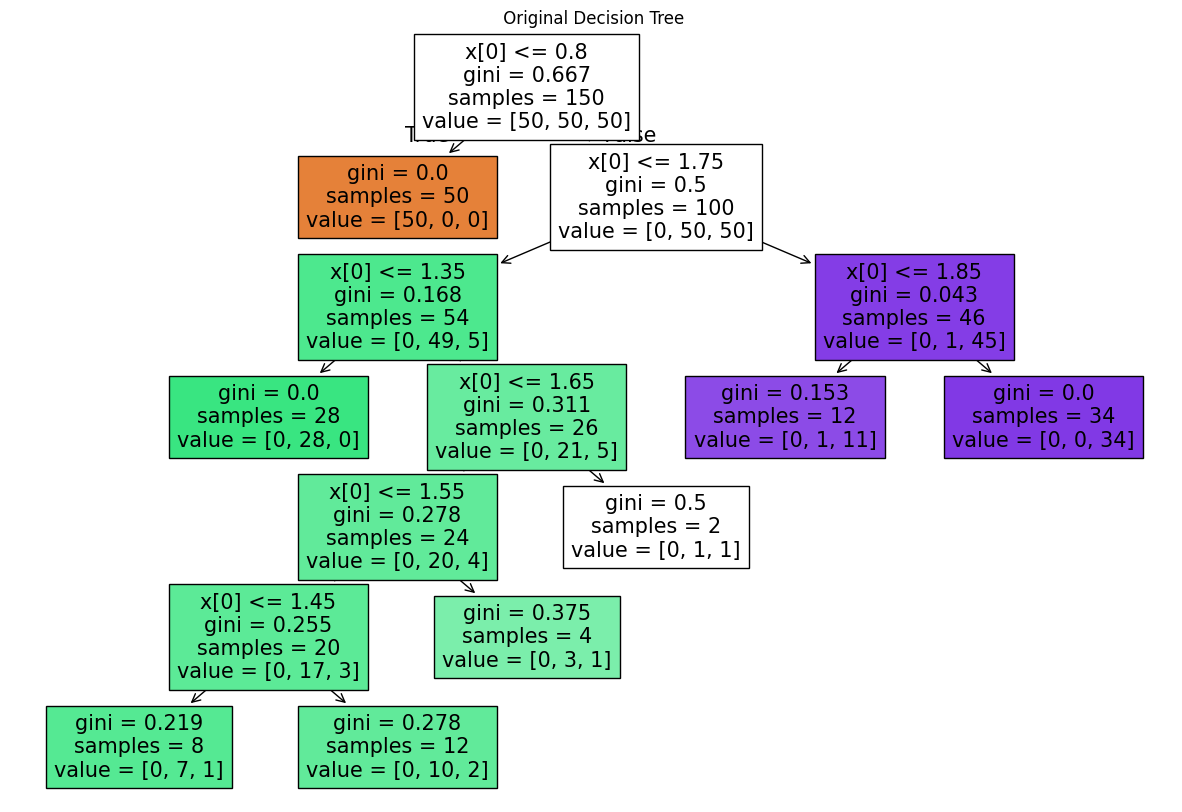

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(model,filled=True)
plt.title(" Original Decision Tree")
plt.show()

In [ ]:
from